In [1]:
# -*- coding: utf-8 -*-
"""
File: ancilla_rotation_map.ipynb
Author: Eddie Kelly
Date: 2024

This file is part of the Quantum algorithm for linear systems of equations for the multi-dimensional Black-Scholes equations project which was completed as part 
of the thesis https://mural.maynoothuniversity.ie/id/eprint/19288/.

License: MIT License
"""

import os 
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..', '..'))) # For importing from parent directory

import numpy as np

import itertools
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit 
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import *
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import UnitaryGate

from HHL.hhl import hhl, HHL_Solver, hhl_poly_pauli_rot
from HHL.ancillacircuit import eigenvalueextract_range
from HHL.ancillarotation import rotation
from Matrices.matrixmod import hermitify_matrix
from BlackScholes.bs_differential_op import black_scholes_1D_prop, black_scholes_1D_improp, black_scholes_1D_analytic
from BlackScholes.lognormal import normal_1D_stock


Text(0, 0.5, 'Rotation angle')

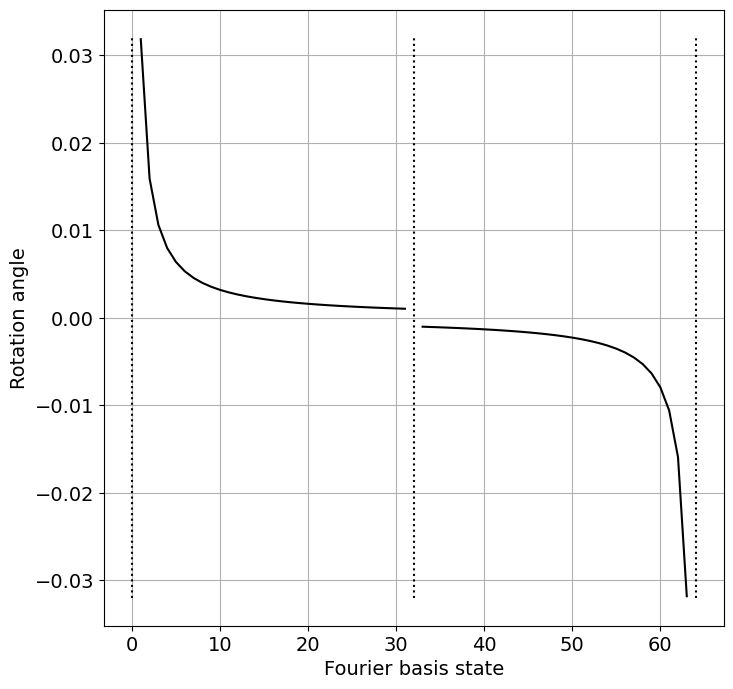

In [3]:
M = 64
t = 0.5
C = 0.2

fourier_list_l = [i for i in range(1,int(M/2))]
fourier_list_r = [i for i in range(int(M/2)+1,M)]
angle_list_l = [rotation(i,M,t,C) for i in fourier_list_l]
angle_list_r = [rotation(i,M,t,C) for i in fourier_list_r]

fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111)
ax1.plot(fourier_list_l,angle_list_l,color='black')
ax1.plot(fourier_list_r,angle_list_r,color='black')
ax1.plot([0,0],[-0.032,0.032],linestyle='dotted',color='black')
ax1.plot([32,32],[-0.032,0.032],linestyle='dotted',color='black')
ax1.plot([64,64],[-0.032,0.032],linestyle='dotted',color='black')
ax1.grid()

ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xlabel('Fourier basis state',fontsize=14)
ax1.set_ylabel('Rotation angle',fontsize=14)